## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 14ms/step - loss: 2.0518 - accuracy: 0.2719 - val_loss: 1.9756 - val_accuracy: 0.2762
Epoch 2/500
196/196 [==============================] - 3s 13ms/step - loss: 1.8779 - accuracy: 0.3429 - val_loss: 1.8528 - val_accuracy: 0.3553
Epoch 3/500
196/196 [==============================] - 3s 13ms/step - loss: 1.8095 - accuracy: 0.3684 - val_loss: 1.8103 - val_accuracy: 0.3600
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7646 - accuracy: 0.3831 - val_loss: 1.7613 - val_accuracy: 0.3842
Epoch 5/500
196/196 [==============================] - 3s 14ms/step - loss: 1.7297 - accuracy: 0.3985 - val_loss: 1.7245 - val_accuracy: 0.3963
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7034 - accuracy: 0.4070 - val_loss: 1.7190 - val_accuracy: 0.3931
Epoch 7/500
196/196 [==============================] - 3s 14ms/step - loss: 1.6799 - accuracy: 0.4150 - val_loss: 1.6893 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.2469 - accuracy: 0.5666 - val_loss: 1.4644 - val_accuracy: 0.4867
Epoch 58/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2432 - accuracy: 0.5668 - val_loss: 1.3897 - val_accuracy: 0.5118
Epoch 59/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2313 - accuracy: 0.5714 - val_loss: 1.5488 - val_accuracy: 0.4476
Epoch 60/500
196/196 [==============================] - 3s 18ms/step - loss: 1.2283 - accuracy: 0.5730 - val_loss: 1.4696 - val_accuracy: 0.4832
Epoch 61/500
196/196 [==============================] - 3s 18ms/step - loss: 1.2189 - accuracy: 0.5757 - val_loss: 1.3961 - val_accuracy: 0.5018
Epoch 62/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2152 - accuracy: 0.5758 - val_loss: 1.4262 - val_accuracy: 0.4964
Epoch 63/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2106 - accuracy: 0.5787 - val_loss: 1.4134 - val_accuracy: 0.500

196/196 [==============================] - 3s 17ms/step - loss: 1.0017 - accuracy: 0.6520 - val_loss: 1.3469 - val_accuracy: 0.5236
Epoch 114/500
196/196 [==============================] - 3s 17ms/step - loss: 0.9960 - accuracy: 0.6570 - val_loss: 1.3609 - val_accuracy: 0.5261
Epoch 115/500
196/196 [==============================] - 3s 17ms/step - loss: 1.0004 - accuracy: 0.6549 - val_loss: 1.4346 - val_accuracy: 0.5075
Epoch 116/500
196/196 [==============================] - 3s 17ms/step - loss: 0.9924 - accuracy: 0.6580 - val_loss: 1.4181 - val_accuracy: 0.5124
Epoch 117/500
196/196 [==============================] - 3s 17ms/step - loss: 0.9875 - accuracy: 0.6585 - val_loss: 1.3578 - val_accuracy: 0.5256
Epoch 118/500
196/196 [==============================] - 3s 17ms/step - loss: 0.9884 - accuracy: 0.6587 - val_loss: 1.3829 - val_accuracy: 0.5224
Epoch 119/500
196/196 [==============================] - 3s 17ms/step - loss: 0.9789 - accuracy: 0.6626 - val_loss: 1.3935 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.8194 - accuracy: 0.7193 - val_loss: 1.4844 - val_accuracy: 0.5154
Epoch 170/500
196/196 [==============================] - 3s 17ms/step - loss: 0.8074 - accuracy: 0.7238 - val_loss: 1.4311 - val_accuracy: 0.5256
Epoch 171/500
196/196 [==============================] - 3s 17ms/step - loss: 0.8074 - accuracy: 0.7234 - val_loss: 1.5465 - val_accuracy: 0.4987
Epoch 172/500
196/196 [==============================] - 3s 17ms/step - loss: 0.8019 - accuracy: 0.7254 - val_loss: 1.4186 - val_accuracy: 0.5269
Epoch 173/500
196/196 [==============================] - 4s 18ms/step - loss: 0.7982 - accuracy: 0.7276 - val_loss: 1.5125 - val_accuracy: 0.5110
Epoch 174/500
196/196 [==============================] - 4s 18ms/step - loss: 0.7985 - accuracy: 0.7262 - val_loss: 1.3879 - val_accuracy: 0.5358
Epoch 175/500
196/196 [==============================] - 4s 18ms/step - loss: 0.7962 - accuracy: 0.7280 - val_loss: 1.5203 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.6359 - accuracy: 0.7855 - val_loss: 1.5049 - val_accuracy: 0.5358
Epoch 226/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6308 - accuracy: 0.7870 - val_loss: 1.6785 - val_accuracy: 0.4930
Epoch 227/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6386 - accuracy: 0.7829 - val_loss: 1.4849 - val_accuracy: 0.5318
Epoch 228/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6359 - accuracy: 0.7824 - val_loss: 1.7263 - val_accuracy: 0.4918
Epoch 229/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6311 - accuracy: 0.7864 - val_loss: 1.5717 - val_accuracy: 0.5176
Epoch 230/500
196/196 [==============================] - 3s 18ms/step - loss: 0.6253 - accuracy: 0.7911 - val_loss: 1.5285 - val_accuracy: 0.5265
Epoch 231/500
196/196 [==============================] - 3s 17ms/step - loss: 0.6198 - accuracy: 0.7906 - val_loss: 1.5436 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.4712 - accuracy: 0.8459 - val_loss: 1.7127 - val_accuracy: 0.5292
Epoch 282/500
196/196 [==============================] - 3s 18ms/step - loss: 0.4922 - accuracy: 0.8401 - val_loss: 1.5714 - val_accuracy: 0.5390
Epoch 283/500
196/196 [==============================] - 3s 18ms/step - loss: 0.4751 - accuracy: 0.8422 - val_loss: 1.6853 - val_accuracy: 0.5201
Epoch 284/500
196/196 [==============================] - 4s 19ms/step - loss: 0.4767 - accuracy: 0.8428 - val_loss: 2.3779 - val_accuracy: 0.4384
Epoch 285/500
196/196 [==============================] - 4s 18ms/step - loss: 0.4748 - accuracy: 0.8463 - val_loss: 1.6174 - val_accuracy: 0.5394
Epoch 286/500
196/196 [==============================] - 3s 18ms/step - loss: 0.4743 - accuracy: 0.8451 - val_loss: 1.7562 - val_accuracy: 0.5145
Epoch 287/500
196/196 [==============================] - 3s 18ms/step - loss: 0.4673 - accuracy: 0.8452 - val_loss: 1.6574 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.3417 - accuracy: 0.8941 - val_loss: 1.7163 - val_accuracy: 0.5424
Epoch 338/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3551 - accuracy: 0.8887 - val_loss: 1.8936 - val_accuracy: 0.5159
Epoch 339/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3695 - accuracy: 0.8854 - val_loss: 1.8958 - val_accuracy: 0.5259
Epoch 340/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3313 - accuracy: 0.8992 - val_loss: 1.8283 - val_accuracy: 0.5316
Epoch 341/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3464 - accuracy: 0.8937 - val_loss: 2.5505 - val_accuracy: 0.4407
Epoch 342/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3582 - accuracy: 0.8895 - val_loss: 1.7972 - val_accuracy: 0.5338
Epoch 343/500
196/196 [==============================] - 3s 17ms/step - loss: 0.3473 - accuracy: 0.8940 - val_loss: 1.7594 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.2624 - accuracy: 0.9276 - val_loss: 1.9564 - val_accuracy: 0.5353
Epoch 394/500
196/196 [==============================] - 3s 17ms/step - loss: 0.2284 - accuracy: 0.9380 - val_loss: 2.0093 - val_accuracy: 0.5214
Epoch 395/500
196/196 [==============================] - 3s 17ms/step - loss: 0.2316 - accuracy: 0.9367 - val_loss: 2.1642 - val_accuracy: 0.5110
Epoch 396/500
196/196 [==============================] - 3s 17ms/step - loss: 0.2666 - accuracy: 0.9243 - val_loss: 1.9344 - val_accuracy: 0.5356
Epoch 397/500
196/196 [==============================] - 3s 18ms/step - loss: 0.2080 - accuracy: 0.9436 - val_loss: 2.0122 - val_accuracy: 0.5234
Epoch 398/500
196/196 [==============================] - 4s 18ms/step - loss: 0.2661 - accuracy: 0.9295 - val_loss: 1.9528 - val_accuracy: 0.5357
Epoch 399/500
196/196 [==============================] - 4s 19ms/step - loss: 0.2275 - accuracy: 0.9389 - val_loss: 2.2132 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.1504 - accuracy: 0.9647 - val_loss: 2.1791 - val_accuracy: 0.5341
Epoch 450/500
196/196 [==============================] - 4s 20ms/step - loss: 0.1438 - accuracy: 0.9670 - val_loss: 2.0910 - val_accuracy: 0.5447
Epoch 451/500
196/196 [==============================] - 4s 22ms/step - loss: 0.1299 - accuracy: 0.9731 - val_loss: 2.0794 - val_accuracy: 0.5459
Epoch 452/500
196/196 [==============================] - 4s 22ms/step - loss: 0.2709 - accuracy: 0.9338 - val_loss: 1.9969 - val_accuracy: 0.5391
Epoch 453/500
196/196 [==============================] - 4s 21ms/step - loss: 0.1314 - accuracy: 0.9719 - val_loss: 2.2511 - val_accuracy: 0.5275
Epoch 454/500
196/196 [==============================] - 4s 21ms/step - loss: 0.1222 - accuracy: 0.9749 - val_loss: 2.1081 - val_accuracy: 0.5393
Epoch 455/500
196/196 [==============================] - 4s 18ms/step - loss: 0.1878 - accuracy: 0.9556 - val_loss: 2.0517 - val_accuracy:

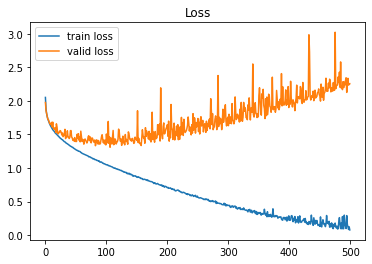

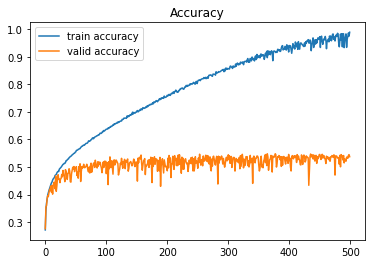

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()